In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

from IPython.display import display, HTML
display(HTML("<style>.jp-Cell { margin-left: -35% !important; margin-right: -35% !important; }</style>"))

In [2]:
def get_latest_csv_data(folder_path):
    # List all files in the given folder
    files = os.listdir(folder_path)
    
    # Filter out only CSV files
    csv_files = [file for file in files if file.endswith('.csv')]
    
    # Sort files in descending order (alphanumeric)
    csv_files.sort(reverse=True)
    
    # Get the first file in the sorted list
    latest_file = csv_files[0]
    
    # Construct the full file path
    file_path = os.path.join(folder_path, latest_file)
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    print("File: " + latest_file)
    
    return df

In [3]:
def get_csv_data(file_name):

    df = pd.read_csv(file_name)
    print("File: " + file_name)
    
    return df

In [4]:
def plot_histograms_(df, bin_count):
    fig, axs = plt.subplots(3, 2, figsize=(20, 18))  # Adjusted figure size for better visibility
    
    # Increase the size of titles and labels
    title_size = 18
    label_size = 14
    
    # Plot histograms with KDE
    sns.histplot(df['count'], bins=8, kde=True, ax=axs[0, 0], color='blue', discrete=True)
    axs[0, 0].set_title('required GPU count', fontsize=title_size)
    axs[0, 0].set_xlabel('GPU count', fontsize=label_size)
    axs[0, 0].set_ylabel('Frequency', fontsize=label_size)

    if not np.issubdtype(df['time_diff'].dtype, np.timedelta64):
        df['time_diff'] = pd.to_timedelta(df['time_diff'])
    df['time_diff_hours'] = df['time_diff'].dt.total_seconds() / 3600  # Convert to hours

    sns.histplot(df['time_diff_hours'], bins=bin_count, kde=True, ax=axs[0, 1], color='green')
    axs[0, 1].set_title('Job Walltime(Hours)', fontsize=title_size)
    axs[0, 1].set_xlabel('Hours', fontsize=label_size)
    axs[0, 1].set_ylabel('Frequency', fontsize=label_size)
    axs[0, 1].set_xlim(left=0)
    x_values = axs[0, 1].get_xticks()
    axs[0, 1].set_xticks(np.linspace(min(x_values), max(x_values), 60))
    axs[0, 1].tick_params(axis='x', rotation=60)
    
    
    sns.histplot(df['computing_load'], bins=5, kde=True, ax=axs[1, 0], color='red', discrete=True)
    axs[1, 0].set_title('Computing Load', fontsize=title_size)
    axs[1, 0].set_xlabel('Computing Load', fontsize=label_size)
    axs[1, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['gpu_utilization'], bins=bin_count, kde=True, ax=axs[1, 1], color='purple')
    axs[1, 1].set_title('GPU Utilization', fontsize=title_size)
    axs[1, 1].set_xlabel('GPU Utilization', fontsize=label_size)
    axs[1, 1].set_ylabel('Frequency', fontsize=label_size)

    sns.histplot(df['flavor'], bins=bin_count, kde=True, ax=axs[2, 0], color='orange')
    axs[2, 0].set_title('Flavor', fontsize=title_size)
    axs[2, 0].set_xlabel('Flavor', fontsize=label_size)
    axs[2, 0].set_ylabel('Frequency', fontsize=label_size)
    
    sns.histplot(df['preemption'], bins=bin_count, kde=True, ax=axs[2, 1], color='brown')
    axs[2, 1].set_title('Preemption', fontsize=title_size)
    axs[2, 1].set_xlabel('Preemption', fontsize=label_size)
    axs[2, 1].set_ylabel('Frequency', fontsize=label_size)

    axs[2, 0].set_ylim(0, len(df))  # 110% of the total number of rows
    axs[2, 1].set_ylim(0, len(df))  # 110% of the total number of rows
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.savefig("last_check.png")
    
    # Show plot
    plt.show()

File: zjob_flow_total(task,flavor,single)_augemented_new_ver.csv


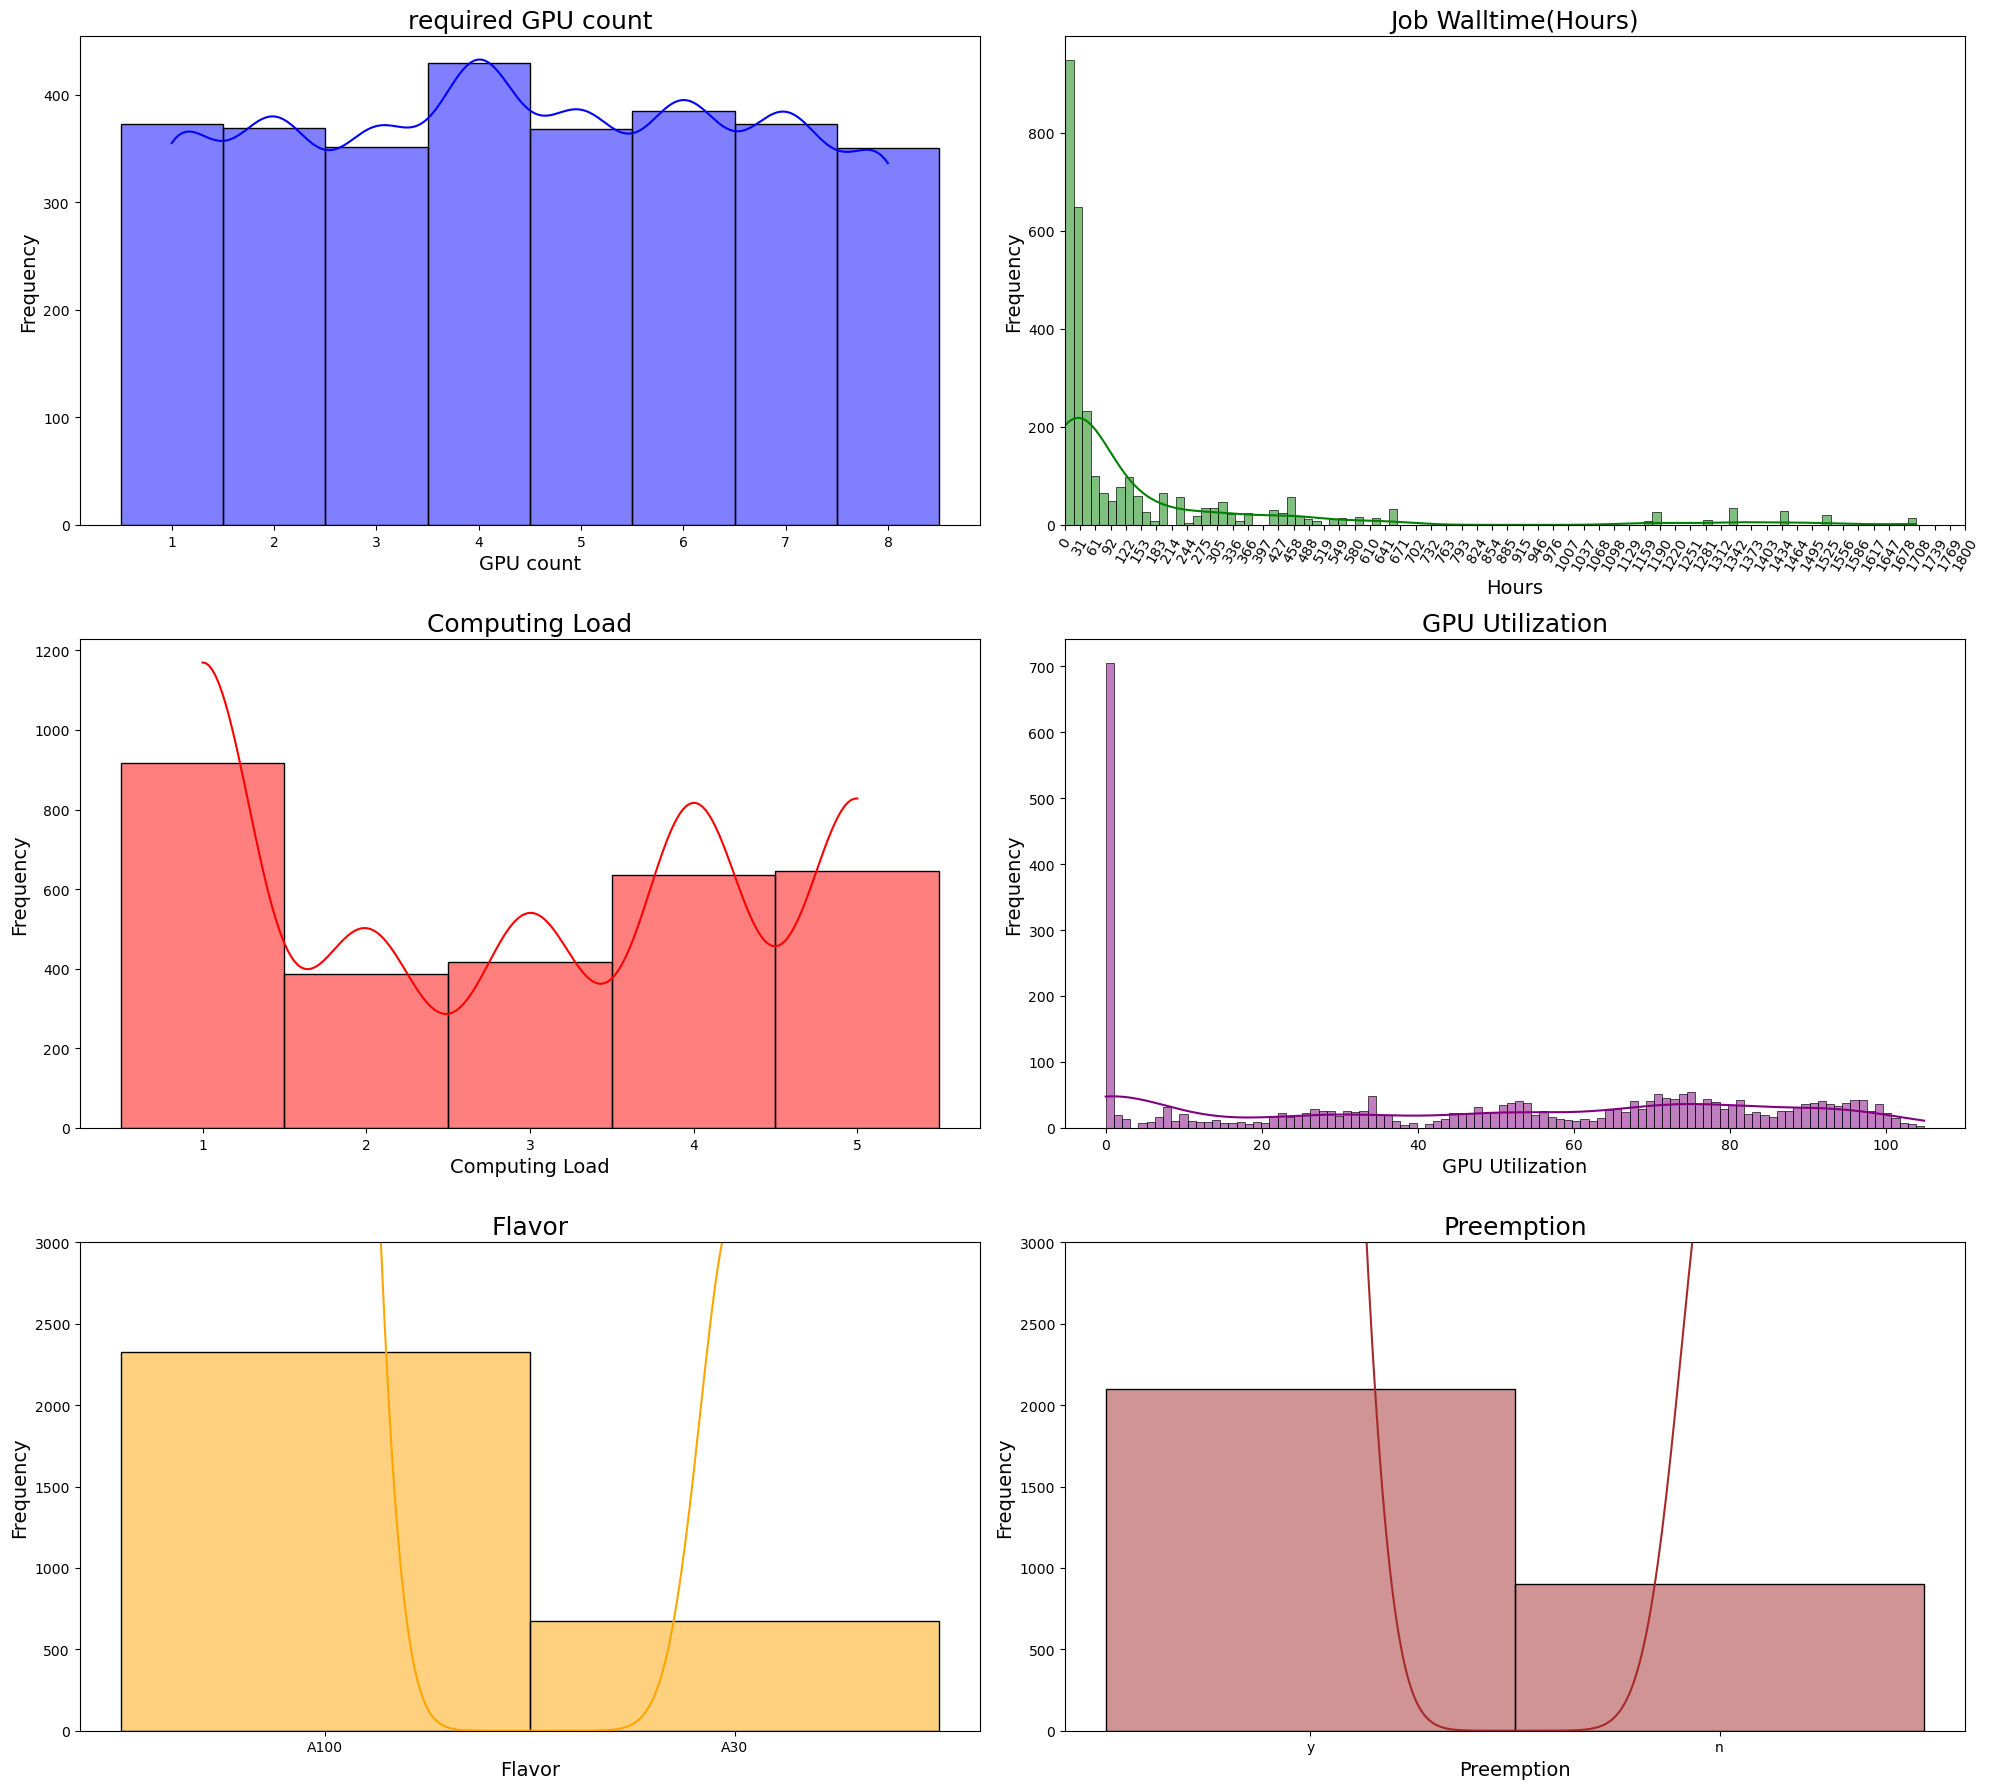

In [5]:
plot_histograms_(get_latest_csv_data('.'), 100)

File: 20241115_081730.csv


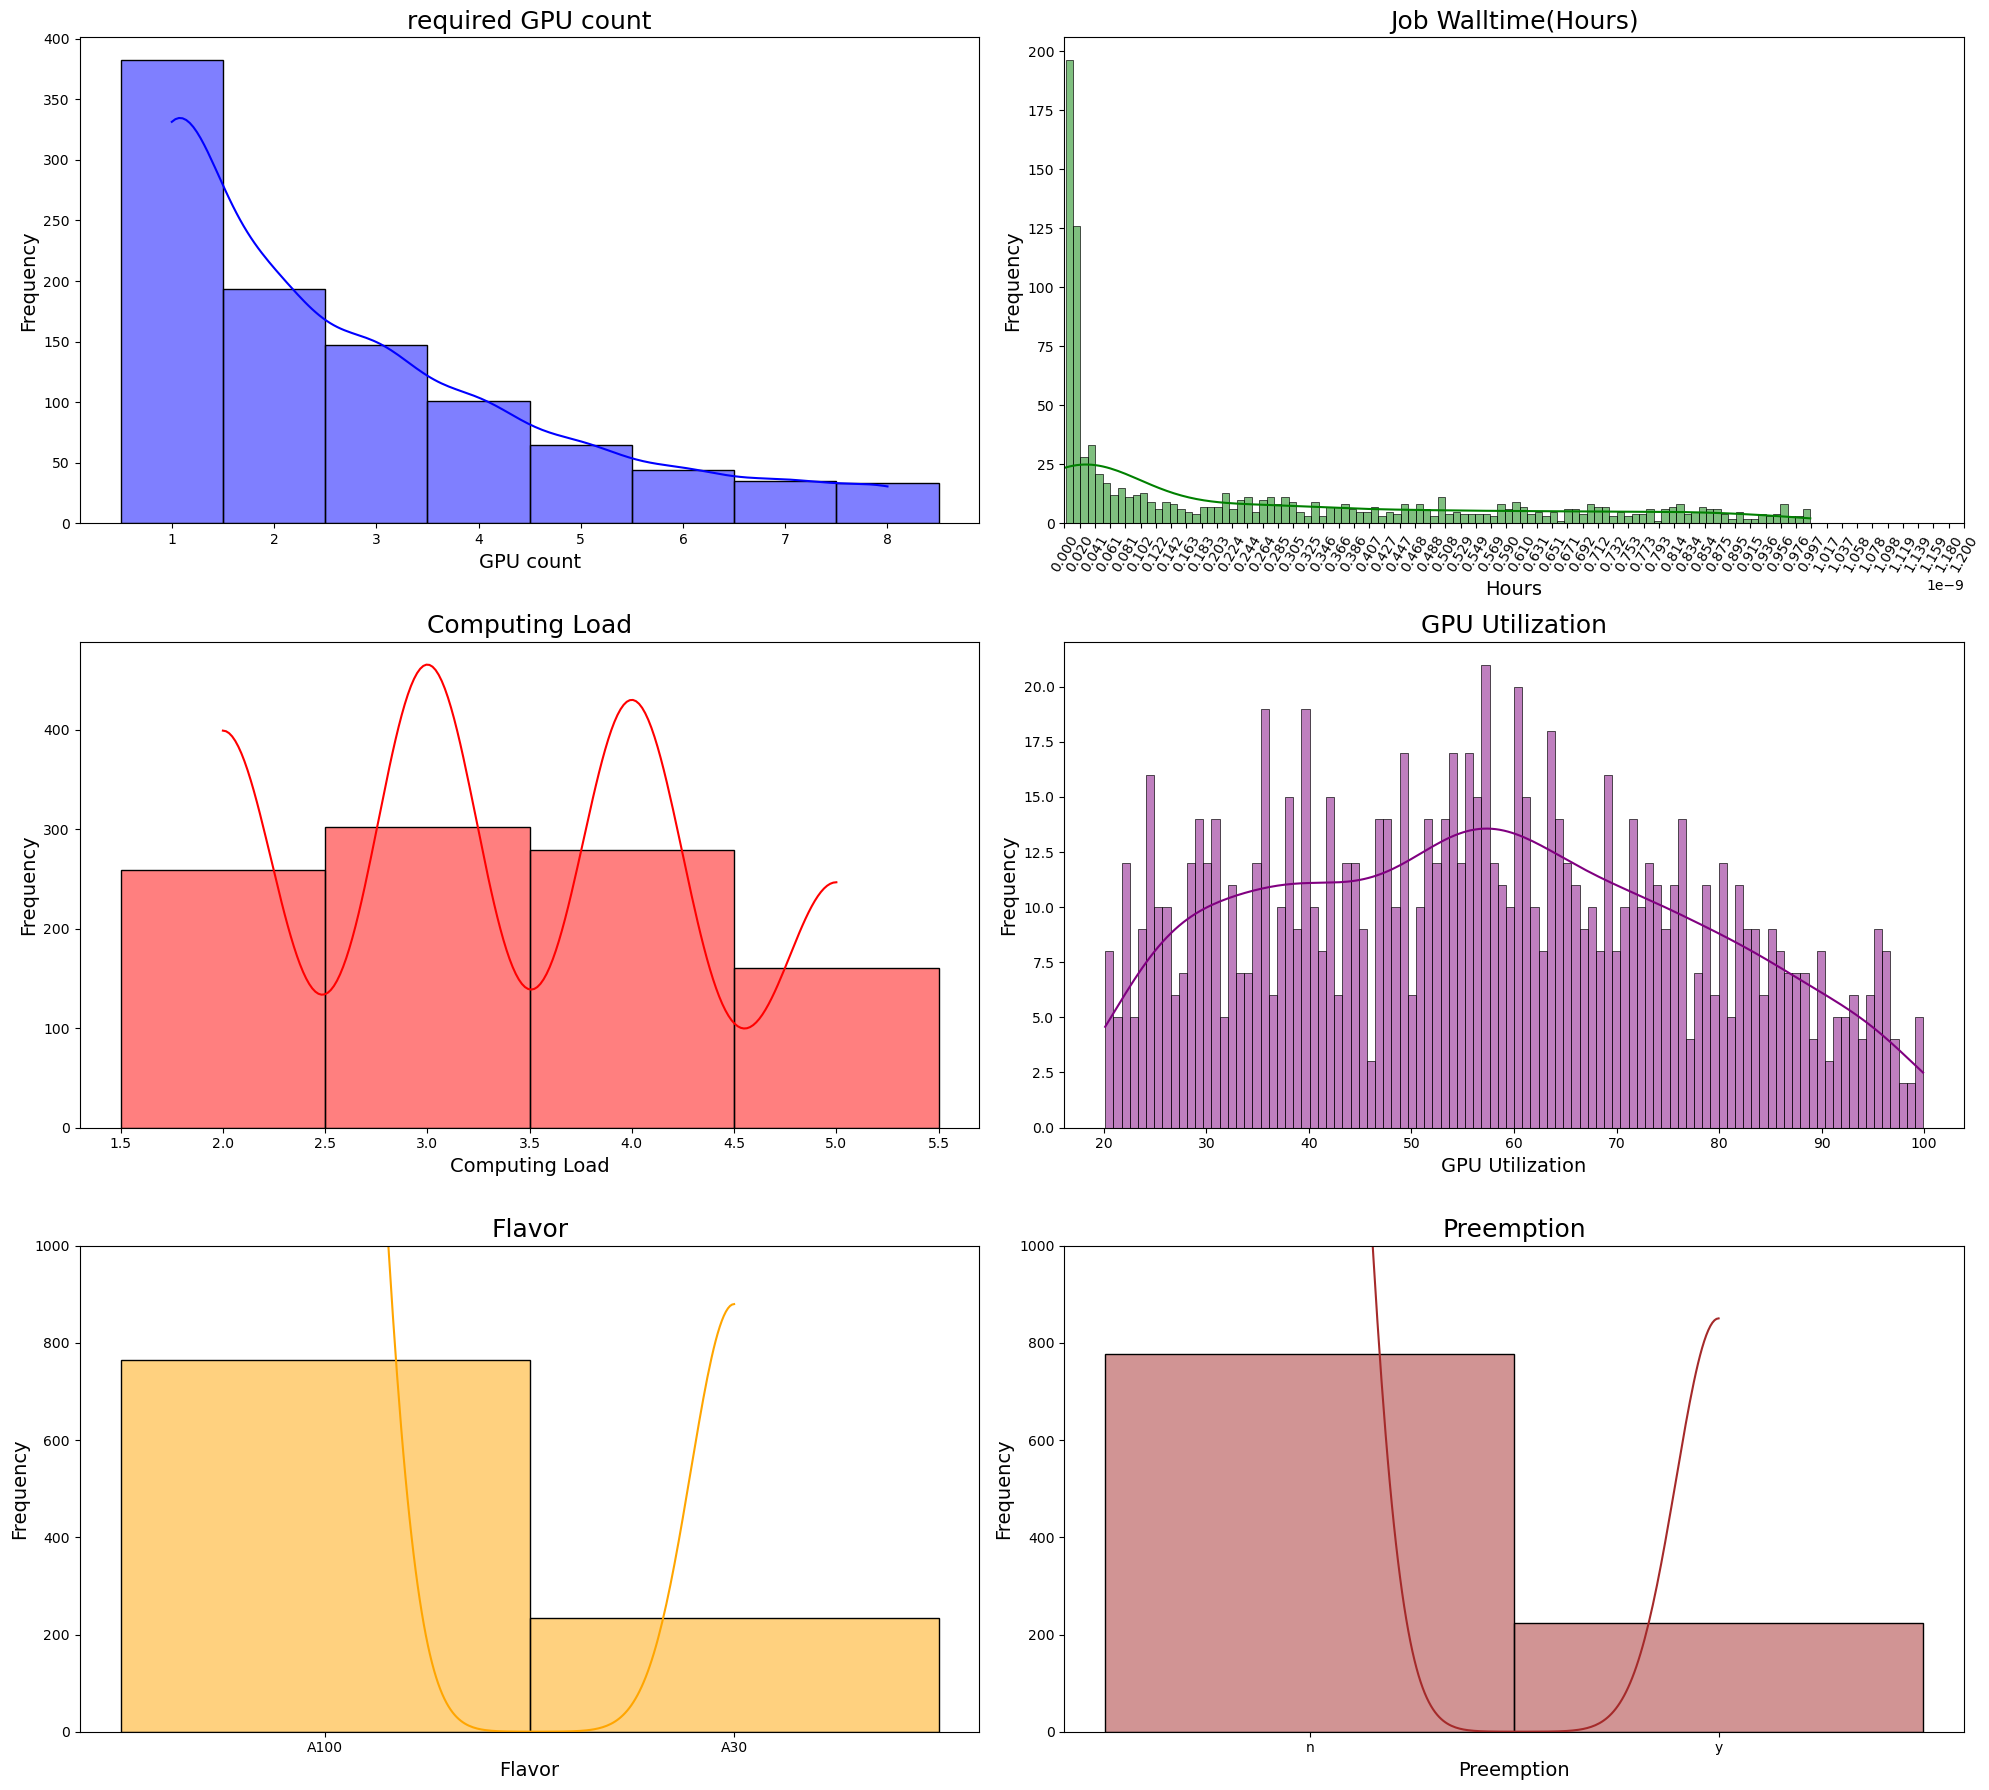

In [6]:
plot_histograms_(get_csv_data('20241115_081730.csv'), 100)

In [7]:
folder_path = '.'  # Replace with your folder path
df = get_latest_csv_data(folder_path)
df

File: zjob_flow_total(task,flavor,single)_augemented_new_ver.csv


,pod_name,pod_type,project,namespace,user_team,start,finish,count,time_diff,computing_load,gpu_utilization,flavor,preemption
0,run-pipeline-gpu-clhnk-1829672999,task,PROJECT_13,ns-16904409679649498,TEAM_1,2024-02-08 00:00:00+00:00,2024-02-27 00:00:00+00:00,5,19 days 00:00:00,4,64.137455,A100,y
1,run-pipeline-gpu-rvpms-439587089,task,PROJECT_4,ns-16904413105821052,NaN,2024-02-08 00:00:00+00:00,2024-02-08 08:00:00+00:00,4,0 days 08:00:00,1,0.000000,A30,n
2,run-pipeline-gpu-swq2n-3049610790,task,PROJECT_4,ns-16904413105821052,NaN,2024-02-08 00:00:00+00:00,2024-02-12 23:00:00+00:00,2,4 days 23:00:00,1,0.000000,A100,y
3,run-pipeline-gpu-fsvst-120632241,task,PROJECT_17,ns-16904374776309414,TEAM_3,2024-02-08 00:00:00+00:00,2024-03-05 05:00:00+00:00,4,26 days 05:00:00,1,0.000000,A100,n
4,run-pipeline-gpu-9cb4p-1757353259,task,PROJECT_13,ns-16904409679649498,TEAM_1,2024-02-08 00:00:00+00:00,2024-03-01 12:00:00+00:00,4,22 days 12:00:00,4,67.128759,A100,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,run-pipeline-gpu-6pclb-2524450674,task,PROJECT_13,ns-16904409679649498,TEAM_1,2026-05-17 17:00:00+00:00,2026-06-12 22:00:00+00:00,2,6 days 09:00:00,1,0.000000,A30,y
2997,run-pipeline-gpu-mtrnc-461812747,task,PROJECT_4,ns-16904374776309414,TEAM_1,2026-05-17 17:00:00+00:00,2026-05-25 16:00:00+00:00,1,5 days 02:00:00,3,54.212235,A30,n
2998,run-pipeline-gpu-764zd-3791762826,task,PROJECT_1,ns-16904409679649498,TEAM_2,2026-05-18 17:00:00+00:00,2026-05-18 23:00:00+00:00,5,0 days 13:00:00,3,54.005399,A100,y
2999,run-pipeline-gpu-q8vbq-2566611081,task,PROJECT_13,ns-16904409679649498,TEAM_1,2026-05-18 17:00:00+00:00,2026-05-21 02:00:00+00:00,4,0 days 07:00:00,1,0.000000,A100,y


In [8]:
df.describe()

,count,computing_load,gpu_utilization
count,3001.000000,3001.000000,3001.000000
mean,4.483839,2.903032,46.430458
std,2.262997,1.553575,35.081878
min,1.000000,1.000000,0.000000
25%,3.000000,1.000000,6.143469
50%,4.000000,3.000000,50.964931
75%,6.000000,4.000000,76.960565
max,8.000000,5.000000,104.876985
